<a href="https://colab.research.google.com/github/olumin/Machine-learning-projects/blob/main/KMeans_clustering_for_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer Segmentation using K-Means Unsupervised learning Algorithm

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas_profiling
import plotly.offline as po
import plotly.graph_objs as go
%matplotlib inline

Exploratory Data Analysis (EDA)

In [209]:
pandas_profiling.ProfileReport(pd.read_csv('/content/Mall_Customers.csv'))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [210]:
#import Customer Churn Dataset
ds = pd.read_csv("/content/Mall_Customers.csv")

In [211]:
#Check the shape of the datasets
ds.shape

(200, 5)

In [212]:
ds.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [213]:
#View the data head
ds.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Data Cleaning and manipulation

In [214]:
#Convert the "No internet service" to "No" for the associated columns.
ds.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [215]:
ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [216]:
#Specifying our data for x in terms of price and quantity
x= ds.iloc[:,[2,4]].values


Visualize the data

In [217]:
plot_by_labels = ds["Age"].value_counts().keys().tolist()
plot_by_values = ds["Annual Income (k$)"].value_counts().values.tolist()

plot_data= [
    go.Pie(labels = plot_by_labels,
           values = plot_by_values,
           marker = dict(colors =  [ 'Teal' ,'Grey'],
                         line = dict(color = "white",
                                     width =  1.5)),
           rotation = 90,
           hoverinfo = "label+value+text",
           hole = .6)
]
plot_layout = go.Layout(dict(title = "Ages with percentage of total Annual Income",
                   plot_bgcolor  = "rgb(243,243,243)",
                   paper_bgcolor = "rgb(243,243,243)",))


fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Choosing the number of clusters using the WCSS- Within clusters sum of squares


In [218]:
# Choosing the Annual Income and Spending score column
x= ds.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [219]:
#Find optimal number of clusters using the Elbow method
from sklearn.cluster import KMeans
wcss=[]

In [220]:
for i in range(1,20):
  kmeans =KMeans(n_clusters= i, init='k-means++', random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

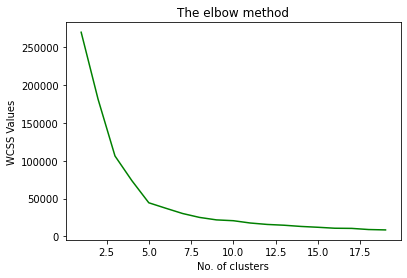

In [221]:
plt.plot(range(1,20), wcss, color='green')
plt.title('The elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS Values')
plt.show()

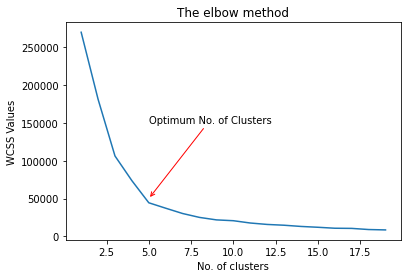

In [222]:
#Annotate point showing the optimum number of clusters
plt.plot(range(1,20), wcss)
plt.title('The elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS Values')

plt.annotate('Optimum No. of Clusters',
             xy=(5,50000), xycoords='data',
             xytext=(5.0, 150000),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3",color='red'))
    


plt.show()


Training the K-Means Clustering Model

In [223]:
kmeansmodel= KMeans(n_clusters = 5, init='k-means++', random_state=0)

In [224]:
y_kmeans = kmeansmodel.fit_predict(x)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [225]:
#return a label for each data point based on their cluster
print(y_kmeans)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Data Visualization

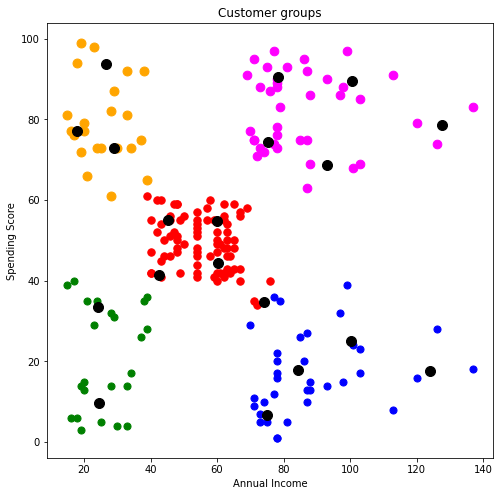

In [226]:
#visualizing all the clusters and their centroids(representation points)
plt.figure(figsize=(8,8))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1], s= 50, c='blue', label= 'Cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1], s= 55, c='red', label= 'Cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1], s= 75, c='magenta', label= 'Cluster 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1], s= 80, c='orange', label= 'Cluster 4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1], s= 50, c='green', label= 'Cluster 5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c='black', label='Centroids')

plt.title('Customer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()